In [ ]:
y = c(28, 8, -3, 7, -1, 1, 18, 12)
se = c(15, 10, 16, 11, 9, 11, 10, 18)
n = length(y)
n

[1] 8

In [ ]:
alpha = 0.05

lower = rep(NA, n)
upper = rep(NA, n)

for (i in 1:n) {
  lower[i] = qnorm(alpha/2, y[i], se[i])
  upper[i] = qnorm(1-alpha/2, y[i], se[i])
}

In [ ]:
qnorm(1-alpha/2, y[length(se)], se[length(se)])
se[length(se)]

[1] 47.27935

[1] 18

In [ ]:
data = data.frame(y, lower, upper)
data

y,lower,upper
<dbl>,<dbl>,<dbl>
28,-1.39946,57.39946
8,-11.59964,27.59964
-3,-34.35942,28.35942
7,-14.55960,28.55960
-1,-18.63968,16.63968
1,-20.55960,22.55960
18,-1.59964,37.59964
12,-23.27935,47.27935


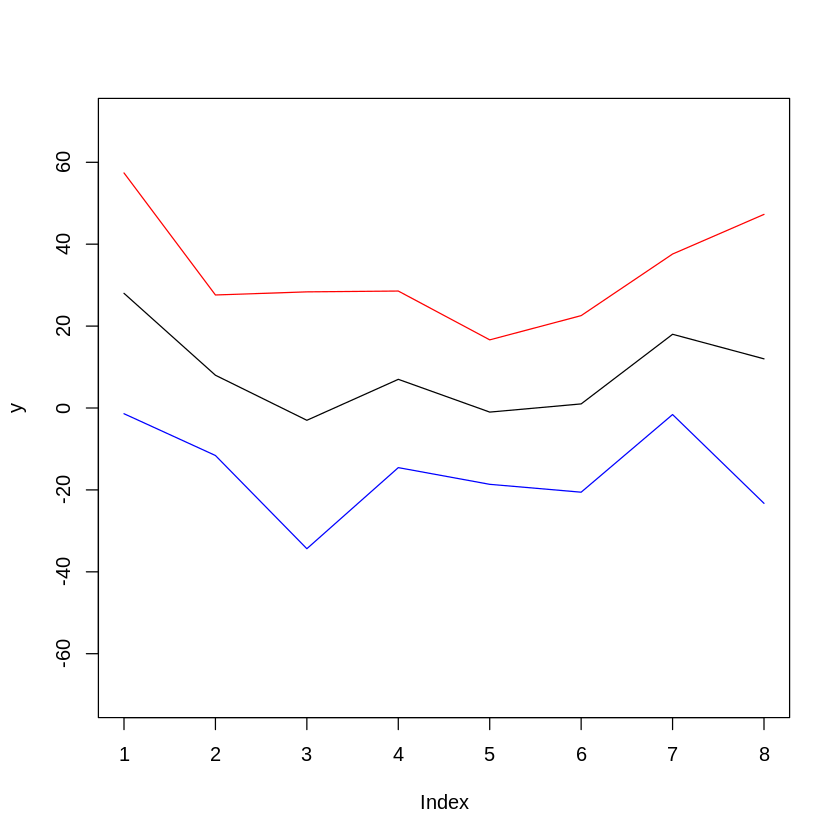

In [ ]:
plot(y, type = 'l', ylim = c(-70, 70))
x = 1:length(y)
lines(x, lower, col = 'blue')
lines(x, upper, col = 'red')

In [ ]:
pooled_est = sum(y/se^2)/sum(1/se^2); pooled_est
pooled_var = sum(1/se^2)^-1; pooled_var

[1] 7.685617

[1] 16.58053

In [ ]:
# gibbs sampler

sigma_sq = 1

n = length(y)

S = 5e2

theta_j = rep(NA, S)
tau = rep(NA, S)
u = rep(NA, S)

tau[1] = u[1] = theta_j[1] = 1

mean_and_tau_conditional_on_y = function(tau_sq, y, sigma_sq, u) {
  rnorm(1, u, sigma_sq + tau_sq)
}

mean_conditional_on_tau_y = function(tau_sq, y, sigma_sq, u) {
  num = sum(y)/(sigma_sq + tau_sq)
  denom = sum(1/(sigma_sq + tau_sq))
  num/denom
}

theta_j_conditional_on_mean_tau_y = function(tau_sq, y, sigma_sq, u) {
  mean = (tau_sq*y + u*sigma_sq)/(sigma_sq + tau_sq)
  var = (sigma_sq*tau_sq)/(sigma_sq + tau_sq)
  rnorm(1, mean, var)
}

tau_updater = function(tau_sq, y, sigma_sq, u) {
  num = 1
  for (i in 1:n) {
    num = num * mean_and_tau_conditional_on_y(tau_sq = tau_sq, y[i], sigma_sq, u = u)
  }
  
  denom = mean_conditional_on_tau_y(tau_sq = tau_sq, y, sigma_sq, u = u)
  num/denom
}

for (iter in 2:S) {

  tau[iter] = tau_updater(tau_sq = tau[iter - 1], y, sigma_sq, u[iter - 1])
  u[iter] = mean_conditional_on_tau_y(tau_sq = tau[iter], y, sigma_sq, u[iter - 1])
  theta_j[iter] = theta_j_conditional_on_mean_tau_y(tau_sq = tau[iter], y, sigma_sq, u=u[iter])

}


Streaming output truncated to the last 5000 lines.
Warning message in rnorm(1, u, sigma_sq + tau_sq):
“NAs produced”
Warning message in rnorm(1, u, sigma_sq + tau_sq):
“NAs produced”
Warning message in rnorm(1, u, sigma_sq + tau_sq):
“NAs produced”
Warning message in rnorm(1, u, sigma_sq + tau_sq):
“NAs produced”
Warning message in rnorm(1, u, sigma_sq + tau_sq):
“NAs produced”
Warning message in rnorm(1, u, sigma_sq + tau_sq):
“NAs produced”
Warning message in rnorm(1, mean, var):
“NAs produced”
Warning message in rnorm(1, u, sigma_sq + tau_sq):
“NAs produced”
Warning message in rnorm(1, u, sigma_sq + tau_sq):
“NAs produced”
Warning message in rnorm(1, u, sigma_sq + tau_sq):
“NAs produced”
Warning message in rnorm(1, u, sigma_sq + tau_sq):
“NAs produced”
Warning message in rnorm(1, u, sigma_sq + tau_sq):
“NAs produced”
Warning message in rnorm(1, u, sigma_sq + tau_sq):
“NAs produced”
Warning message in rnorm(1, u, sigma_sq + tau_sq):
“NAs produced”
Warning message in rnorm(1, u, sigma

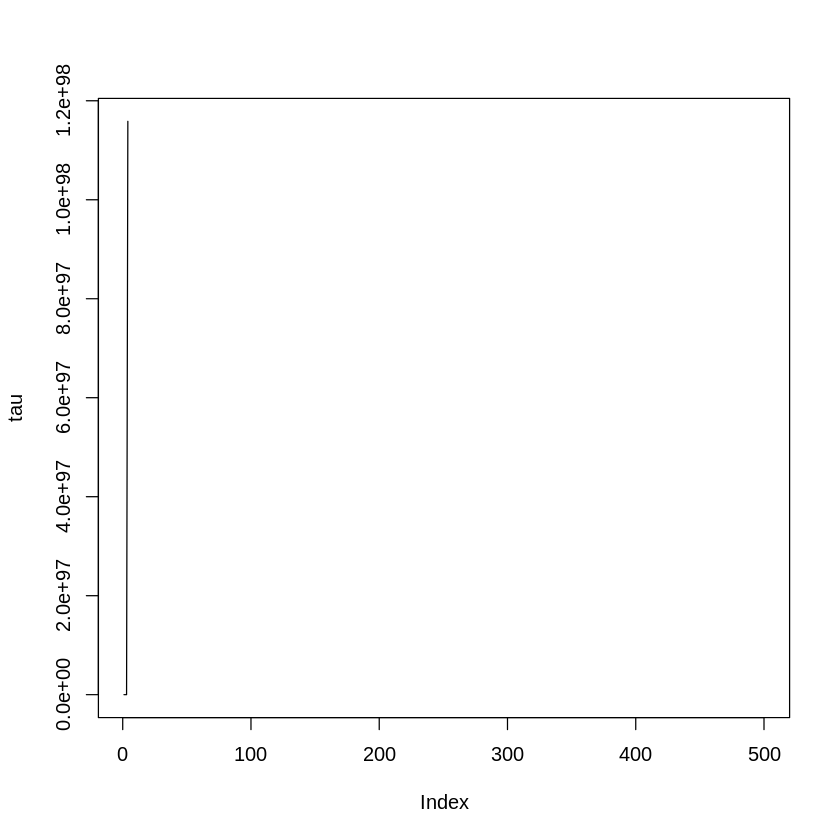

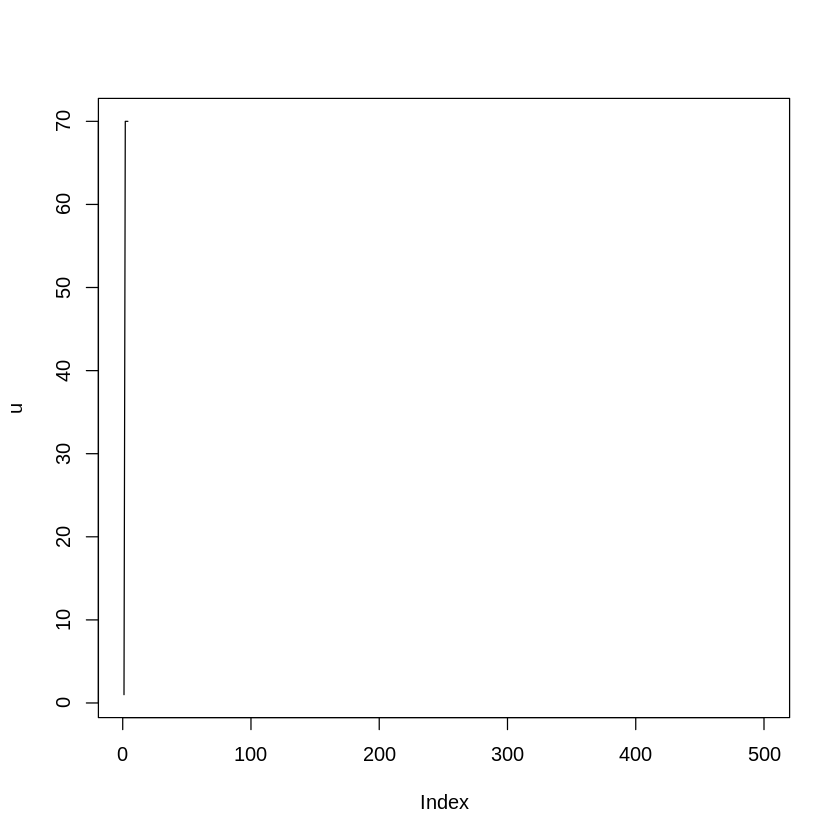

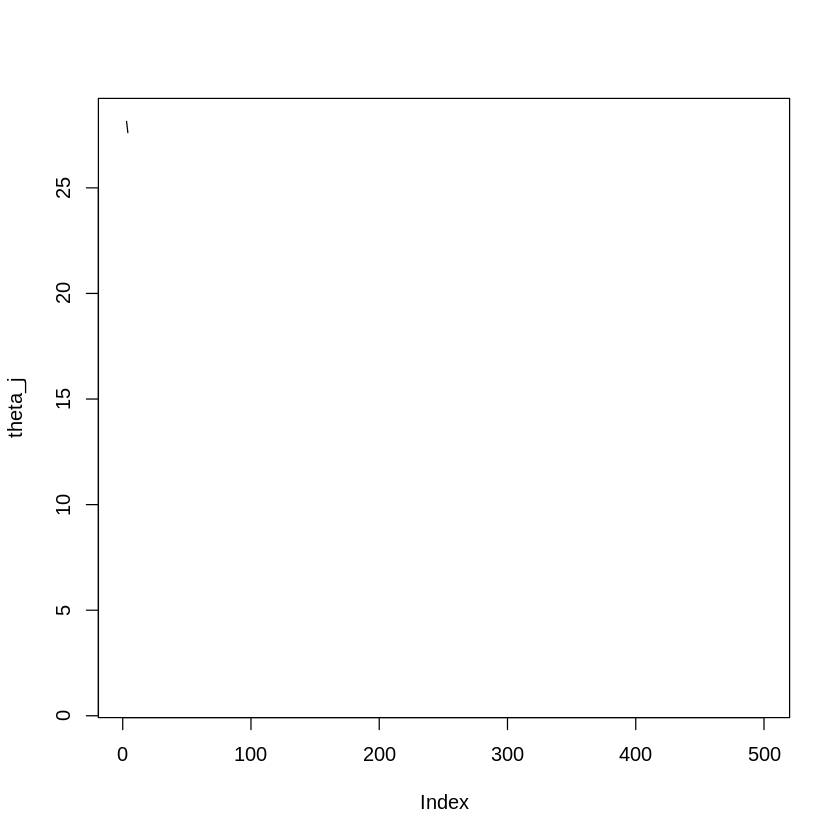

In [ ]:
plot(tau, type = 'l')
plot(u, type = 'l')
plot(theta_j, type = 'l')